In [1]:
from numpy import genfromtxt, zeros
from pylab import plot, show, figure, subplot, hist, xlim
from sklearn.naive_bayes import GaussianNB

In [2]:
data = genfromtxt('data.csv',delimiter=',',usecols=(0,1,2,3))
target = genfromtxt('data.csv',delimiter=',',usecols=(4),dtype=str)

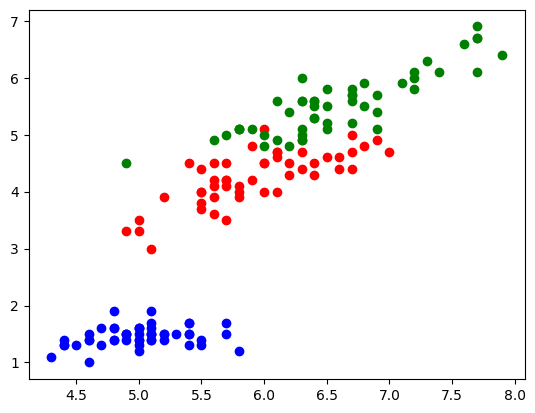

In [3]:
plot(data[target=='setosa',0],data[target=='setosa',2],'bo')
plot(data[target=='versicolor',0],data[target=='versicolor',2],'ro')
plot(data[target=='virginica',0],data[target=='virginica',2],'go')
show()

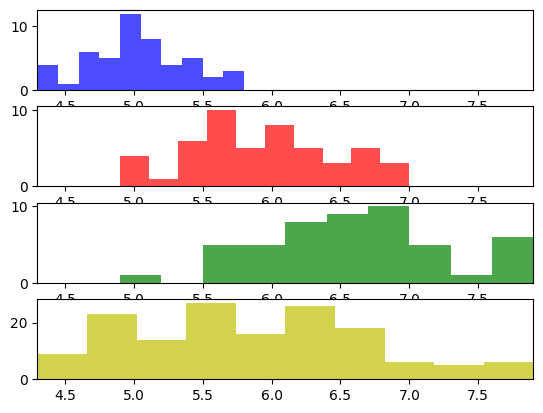

In [4]:
xmin = min(data[:,0])
xmax = max(data[:,0])
figure()
subplot(411) # distribution of the setosa class (1st, on the top)
hist(data[target=='setosa',0],color='b',alpha=.7)
xlim(xmin,xmax)
subplot(412) # distribution of the versicolor class (2nd)
hist(data[target=='versicolor',0],color='r',alpha=.7)
xlim(xmin,xmax)
subplot(413) # distribution of the virginica class (3rd)
hist(data[target=='virginica',0],color='g',alpha=.7)
xlim(xmin,xmax)
subplot(414) # global histogram (4th, on the bottom)
hist(data[:,0],color='y',alpha=.7)
xlim(xmin,xmax)
show()

In [5]:


t = zeros(len(target))
t[target == 'setosa'] = 1
t[target == 'versicolor'] = 2
t[target == 'virginica'] = 3

In [6]:
classifier = GaussianNB()
classifier.fit(data,t)

GaussianNB()

In [7]:
print (classifier.predict([data[0]]))
print (t[0])

[1.]
1.0


In [8]:
from sklearn.model_selection import train_test_split


(train, test, t_train, t_test) = train_test_split(data, t,test_size=0.4, random_state=0)
classifier.fit(train,t_train) # train
print(classifier.score(test,t_test)) # test

0.9333333333333333


In [9]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(classifier.predict(test),t_test))

[[16  0  0]
 [ 0 23  4]
 [ 0  0 17]]


In [10]:
from sklearn.metrics import classification_report
print(classification_report(classifier.predict(test), t_test,
target_names=['setosa', 'versicolor', 'virginica']))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.85      0.92        27
   virginica       0.81      1.00      0.89        17

    accuracy                           0.93        60
   macro avg       0.94      0.95      0.94        60
weighted avg       0.95      0.93      0.93        60



In [11]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# cross validation with 6 iterations
lin_model_kfold = KFold(n_splits=5)
scores=cross_val_score(classifier, data, t, cv=lin_model_kfold)

In [12]:
from numpy import mean
print (mean(scores))

0.9466666666666667
